## seaborn

In [3]:
adata_subset.obs

,Library,Cell barcode,Time point,Starting population,Cell type annotation,Well,SPRING-x,SPRING-y,clone_id
0,d6_2_2,GCGTGCAA-AGAAGTTA,6,Lin-Kit+Sca1-,Undifferentiated,2,411.496,-96.190,573
1,d6_2_2,AAGGGACC-CTCGATGC,6,Lin-Kit+Sca1-,Undifferentiated,2,-587.462,-306.925,1440
2,d6_2_2,CGTACCGA-AGCGCCTT,6,Lin-Kit+Sca1-,Monocyte,2,1429.805,-429.300,394
4,d6_2_2,CCGTAGCT-AGGCAGTT,6,Lin-Kit+Sca1-,Undifferentiated,2,-1169.594,362.010,1972
6,d6_2_2,TAGGCTTT-CGTGGATA,6,Lin-Kit+Sca1-,Neutrophil,2,1236.039,-2113.013,1450
...,...,...,...,...,...,...,...,...,...
130874,LSK_d6_1_3,CTGTGACC-TGCTATTT,6,Lin-Kit+Sca1+,Undifferentiated,1,307.879,-27.451,4999
130875,LSK_d6_1_3,AGGCGTTT-CCTATTCA,6,Lin-Kit+Sca1+,Undifferentiated,1,-1074.917,441.981,12
130876,LSK_d6_1_3,CGTGCAAC-TGGCCTGT,6,Lin-Kit+Sca1+,Undifferentiated,1,247.634,281.262,267
130877,LSK_d6_1_3,CCCTTGCA-AGTGAAAG,6,Lin-Kit+Sca1+,Neutrophil,1,353.734,-980.246,3534


In [4]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns

input_dir = "/Users/apple/Desktop/KB/data"
# output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_713_colab"
num_top_lg_toplot = 5

# Load dataset
data = np.load(input_dir + '/feat_720_sup/scBaseEncoderFeat_Z_bs200_tau0.5.npy')
adata_subset = ad.read_h5ad(input_dir + '/LarryData/Larry_41201_2000.h5ad')
# data = np.load(input_dir+'/feat_submission/feat_1006_bs260_sf04_larry_hotspot/scBaseEncoderFeat_Z_bs260_tau0.5.npy')
# adata_subset = ad.read_h5ad(input_dir+'/LarryData/Larry_41093_2000_norm_log.h5ad')
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

categories = adata_subset.obs['clone_id'].to_numpy()

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Determine the top lineages
unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

# Define category to color mapping
unique_categories = np.unique(categories)
colors = sns.color_palette('husl', len(unique_categories))
category_to_color = dict(zip(unique_categories, colors))

default_color = 'gray'

# Define marker shapes
marker_shapes = ['o', '^', 's', '*', 'P']  # circle, triangle, square, star, pentagon

plt.figure(figsize=(12, 8))

# Plot all other lineages first
for label in np.unique(labels):
    if label not in top_lineages:
        subset = embedding[labels == label]
        sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=default_color, s=1, alpha=0.2)

# Plot the top lineages with different shapes
for i, lineage in enumerate(top_lineages):
    subset = embedding[labels == lineage]
    subset_categories = categories[labels == lineage]
    for category in np.unique(subset_categories):
        sns.scatterplot(x=subset[subset_categories == category][:, 0], 
                        y=subset[subset_categories == category][:, 1], 
                        color=category_to_color[category], 
                        marker=marker_shapes[i], 
                        s=25, 
                        alpha=1, 
                        label=f'{lineage}: {category}')

plt.title(f'UMAP for 41201 Cells with Top 5 Largest Lineages Highlighted')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Create a legend for the categories present in the specific lineage
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Lineage: Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

# plt.savefig(output_dir + '/cell_umap_top_5_largest_plot.png', dpi=300)
plt.show()


data shape (41201, 64)
labels shape 41201


Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x7fed51260820>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


In [7]:
adata_subset[adata_subset.obs["clone_id"]==980].obs

,Library,Cell barcode,time_info,Starting population,state_info,Well,SPRING-x,SPRING-y,Time point,clone_id,n_genes
LSK_d6_2_3:GGCTATAAGCGTTGCT,LSK_d6_2_3,GGCTATAA-GCGTTGCT,6.0,Lin-Kit+Sca1+,Meg,2,-1695.234,637.859,6,980,468
LSK_d6_2_2:ATTCTGAGAAGGTAAT,LSK_d6_2_2,ATTCTGAG-AAGGTAAT,6.0,Lin-Kit+Sca1+,Undifferentiated,2,-1268.008,514.199,6,980,486
LSK_d4_2_3:AAACGATCATGAAGCA,LSK_d4_2_3,AAACGATC-ATGAAGCA,4.0,Lin-Kit+Sca1+,Undifferentiated,2,-1030.333,436.974,4,980,645
LSK_d4_2_2:GGATTGTTTGACGGAC,LSK_d4_2_2,GGATTGTT-TGACGGAC,4.0,Lin-Kit+Sca1+,Undifferentiated,2,-1109.544,344.273,4,980,665
LSK_d4_2_2:AACGGTAGGGTTTCTC,LSK_d4_2_2,AACGGTAG-GGTTTCTC,4.0,Lin-Kit+Sca1+,Undifferentiated,2,-821.575,429.545,4,980,895


In [6]:
data[0,0:5]

array([0.       , 1.0920045, 0.       , 0.       , 0.       ],
      dtype=float32)

data shape (41201, 64)
labels shape 41201


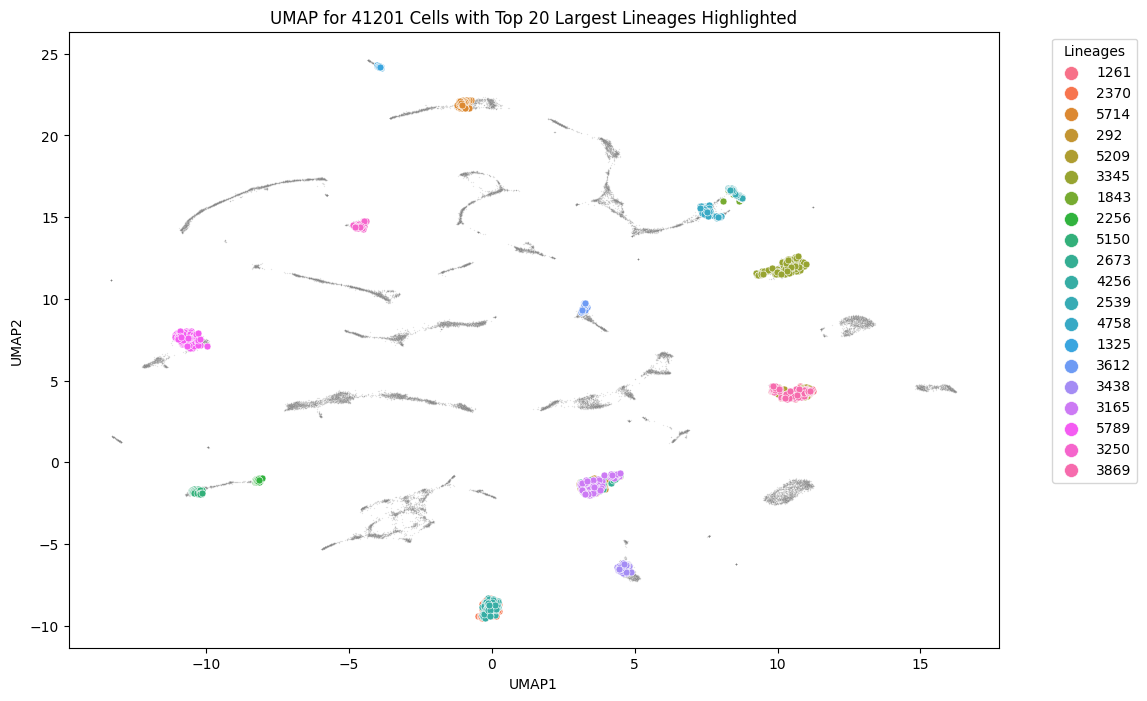

In [2]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad
import seaborn as sns

input_dir = "/Users/apple/Desktop/KB/data"
output_dir = "/Users/apple/Desktop/KB/SCSeq_LineageBarcoding2/SCSeq_LineageBarcoding/SCLineage_ConstrativeLearning/out/plot/feat_713_colab"
num_top_lg_toplot = 20  # Updated to top 20 lineages

# Load dataset
data = np.load(input_dir + '/feat_713_colab/scBaseEncoderFeat_Z_bs100_tau0.5.npy')
adata_subset = ad.read_h5ad(input_dir + '/LarryData/Larry_41201_2000.h5ad')
labels = adata_subset.obs["clone_id"].to_numpy()
num_cells = labels.shape[0]

categories = adata_subset.obs['Cell type annotation'].to_numpy()

print("data shape", data.shape)
print("labels shape", num_cells)

# Initialize UMAP and fit the data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Determine the top lineages
unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

# Define lineage to color mapping
colors = sns.color_palette('husl', len(top_lineages))
lineage_to_color = dict(zip(top_lineages, colors))

default_color = 'gray'

plt.figure(figsize=(12, 8))

# Plot all other lineages first
for label in np.unique(labels):
    if label not in top_lineages:
        subset = embedding[labels == label]
        sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=default_color, s=1, alpha=0.2)

# Plot the top lineages with different colors
for i, lineage in enumerate(top_lineages):
    subset = embedding[labels == lineage]
    subset_categories = categories[labels == lineage]
    sns.scatterplot(x=subset[:, 0], y=subset[:, 1], color=lineage_to_color[lineage], s=25, alpha=1, label=f'{lineage}')

plt.title(f'UMAP for 41201 Cells with Top 20 Largest Lineages Highlighted')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Create a legend for the top lineages
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Lineages", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=2)

# plt.savefig(output_dir + '/cell_umap_top_20_largest_plot.png', dpi=300)
plt.show()
